## IMPORTING LIBRARYS

In [70]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns  

## LOADING AND PREPARING DATA 

In [3]:
df_air=pd.read_csv("./data/Air_Traffic_Passenger_Statistics.csv") 
df_air=df_air.sample(frac=1)
df_air
df_air_year=df_air.copy() 
df_air_year["Activity Period"]=[int(str(period)[0:4]) for period in df_air['Activity Period']] 
df_air_year

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
568,2005,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,International,Australia / Oceania,Deplaned,Other,International,G,7591
1523,2006,Hawaiian Airlines,HA,Hawaiian Airlines,HA,Domestic,US,Enplaned,Other,Terminal 1,C,7231
8407,2011,China Airlines,CI,China Airlines,CI,International,Asia,Deplaned,Other,International,A,10928
20933,2019,Alaska Airlines,AS,Alaska Airlines,AS,International,Mexico,Enplaned,Other,Terminal 2,D,9043
10631,2013,SkyWest Airlines,OO,United Airlines - Pre 07/01/2013,UA,International,Canada,Deplaned,Other,Terminal 3,F,7679
...,...,...,...,...,...,...,...,...,...,...,...,...
5848,2009,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 3,E,31349
22003,2020,All Nippon Airways,NH,All Nippon Airways,NH,International,Asia,Enplaned,Other,International,G,2684
8539,2011,Horizon Air,QX,Alaska Airlines,AS,Domestic,US,Deplaned,Other,Terminal 1,B,6262
12072,2014,Delta Air Lines,DL,Delta Air Lines,DL,Domestic,US,Deplaned,Other,Terminal 1,C,110062


## VISUALIZING DATA

### QUICK REAJUSTING

In [4]:
sas=df_air_year['Operating Airline'].copy()
sas[sas == "United Airlines - Pre 07/01/2013"]='United Airlines' 
sas
df_air_year['Operating Airline']=sas 
df_air_year

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
568,2005,United Airlines,UA,United Airlines - Pre 07/01/2013,UA,International,Australia / Oceania,Deplaned,Other,International,G,7591
1523,2006,Hawaiian Airlines,HA,Hawaiian Airlines,HA,Domestic,US,Enplaned,Other,Terminal 1,C,7231
8407,2011,China Airlines,CI,China Airlines,CI,International,Asia,Deplaned,Other,International,A,10928
20933,2019,Alaska Airlines,AS,Alaska Airlines,AS,International,Mexico,Enplaned,Other,Terminal 2,D,9043
10631,2013,SkyWest Airlines,OO,United Airlines - Pre 07/01/2013,UA,International,Canada,Deplaned,Other,Terminal 3,F,7679
...,...,...,...,...,...,...,...,...,...,...,...,...
5848,2009,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 3,E,31349
22003,2020,All Nippon Airways,NH,All Nippon Airways,NH,International,Asia,Enplaned,Other,International,G,2684
8539,2011,Horizon Air,QX,Alaska Airlines,AS,Domestic,US,Deplaned,Other,Terminal 1,B,6262
12072,2014,Delta Air Lines,DL,Delta Air Lines,DL,Domestic,US,Deplaned,Other,Terminal 1,C,110062


### AIRLINES BY PERIOD 

In [235]:
commonfour=df_air_year.groupby("Operating Airline").sum().sort_values(by=['Passenger Count'],ascending=False)
mcommon=commonfour.reset_index()["Operating Airline"].head(4).to_list() 
mcommon  
bigcom=[] 
for i in df_air_year['Operating Airline']: 
    if i in mcommon: 
        bigcom.append(i) 
    else: 
        bigcom.append("Others") 
df_air_year["big_com"]=bigcom 
df_air_year  
mcommon.reverse()
mcommon.append('Others')    

In [255]:
df_air_year[df_air_year["Activity Period"] == 2017].groupby("Operating Airline").sum().sort_values(by=['Passenger Count'],ascending=False)

,Activity Period,Passenger Count
Operating Airline,,
United Airlines,716035,21707841
Virgin America,96816,5263650
SkyWest Airlines,223887,3887792
American Airlines,96816,3763394
Southwest Airlines,72612,3704789
Delta Air Lines,52442,3602617
Alaska Airlines,133122,1631098
JetBlue Airways,66561,1582654
Air Canada,48408,928932


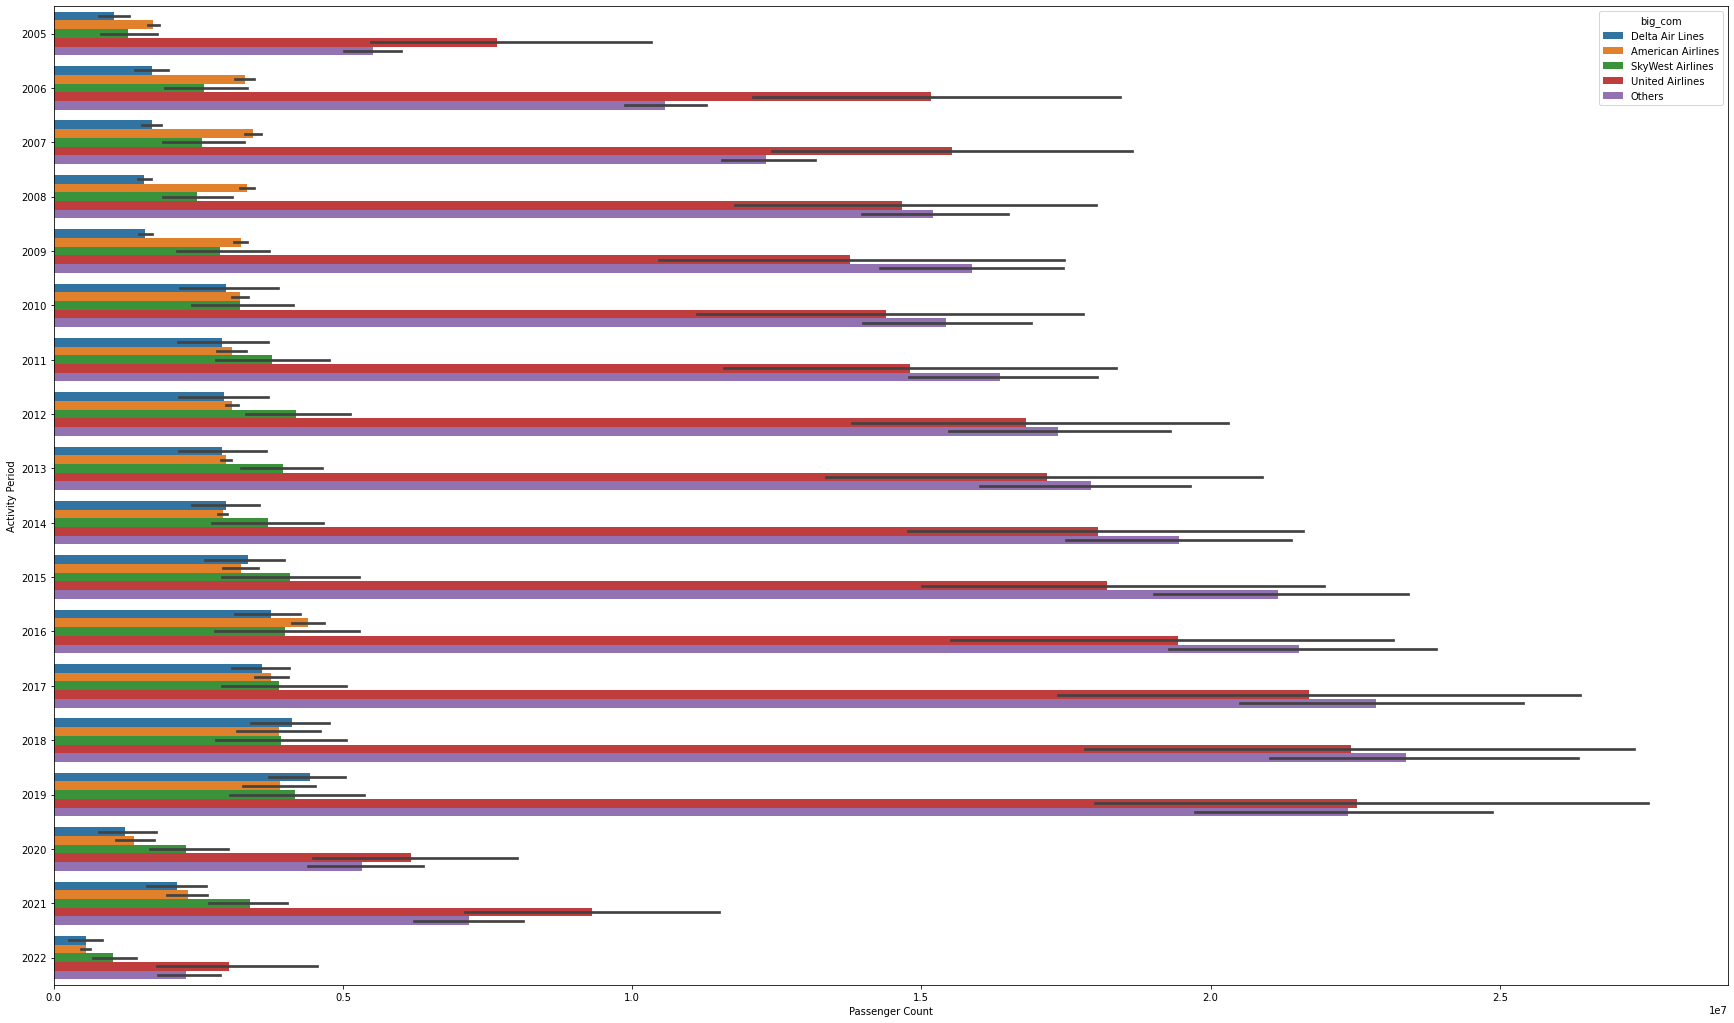

In [276]:
fig=plt.figure(figsize=(30,18))
kwargs={'mouseover':True}
barto=sns.barplot(data=df_air_year,y='Activity Period',x='Passenger Count',hue='big_com',orient='h',dodge=True,hue_order=mcommon,estimator=lambda a : a.sum())      